# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [104]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [105]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [106]:
df['YEAR']

#33 years, 1992-2019

0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [107]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

michigan_data = df[df['STATE'] == 'MICHIGAN']
ohio_data = df[df['STATE'] == 'OHIO']
michigan_average_scores = {
    '4th_grade_read_avg': michigan_data['AVG_READING_4_SCORE'].mean(),
    '8th_grade_math_avg': michigan_data['AVG_MATH_8_SCORE'].mean(),
    '4th_grade_math_avg':michigan_data['AVG_MATH_4_SCORE'].mean(),
    '8th_grade_read_avg': michigan_data['AVG_READING_8_SCORE'].mean(),
}
ohio_average_scores = {
    '4th_grade_read_avg': ohio_data['AVG_READING_4_SCORE'].mean(),
    '8th_grade_math_avg': ohio_data['AVG_MATH_8_SCORE'].mean(),
    '4th_grade_math_avg':ohio_data['AVG_MATH_4_SCORE'].mean(),
    '8th_grade_read_avg': ohio_data['AVG_READING_8_SCORE'].mean(),
}
mich_mean = sum(michigan_average_scores.values())/len(michigan_average_scores)
ohio_mean = sum(ohio_average_scores.values())/len(ohio_average_scores)
print(mich_mean)
print(ohio_mean)

#it seems that ohio has a slightly greater test score
#but thats probably not true, Michigan should have a higher avg (Go Blue)

249.1111111111111
255.11111111111114


Find the average for your outcome score across all states in 2019

In [115]:
#Im a little confused on what exactly is outcome score since its not one of th columns 
#Is outcome score the average of all 4 grade columns?


df['AVG_OUTCOME_SCORE'] = (df['AVG_MATH_4_SCORE'] + df['AVG_MATH_8_SCORE'] + df['AVG_READING_8_SCORE'] + df['AVG_READING_8_SCORE']) / 4

stateavg = df[df['YEAR'] == 2019][["STATE", "OUTCOME_SCORE"]]
print(stateavg)




                     STATE  OUTCOME_SCORE
1662               ALABAMA         251.25
1663                ALASKA         252.50
1664               ARIZONA         259.00
1665              ARKANSAS         256.25
1666            CALIFORNIA         257.25
1667              COLORADO         265.25
1668           CONNECTICUT         267.25
1669              DELAWARE         259.00
1670  DISTRICT_OF_COLUMBIA         251.00
1671                 DODEA         275.50
1672               FLORIDA         262.75
1673               GEORGIA         260.25
1674                HAWAII         257.50
1675                 IDAHO         265.00
1676              ILLINOIS         262.50
1677               INDIANA         265.75
1678                  IOWA         261.75
1679                KANSAS         261.75
1680              KENTUCKY         260.75
1681             LOUISIANA         254.25
1682                 MAINE         263.25
1683              MARYLAND         261.75
1684         MASSACHUSETTS        

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [116]:
df.groupby(["STATE"])["AVG_OUTCOME_SCORE"].max()

STATE
ALABAMA                 254.00
ALASKA                  260.25
ARIZONA                 261.75
ARKANSAS                260.50
CALIFORNIA              258.75
COLORADO                269.75
CONNECTICUT             269.75
DELAWARE                264.25
DISTRICT_OF_COLUMBIA    251.00
DODEA                   275.50
FLORIDA                 264.75
GEORGIA                 262.25
HAWAII                  261.00
IDAHO                   266.75
ILLINOIS                264.50
INDIANA                 269.75
IOWA                    267.25
KANSAS                  268.00
KENTUCKY                265.50
LOUISIANA               254.50
MAINE                   268.25
MARYLAND                270.00
MASSACHUSETTS           277.00
MICHIGAN                262.25
MINNESOTA               272.50
MISSISSIPPI             256.75
MISSOURI                265.25
MONTANA                 270.75
NATIONAL                265.75
NEBRASKA                268.00
NEVADA                  259.50
NEW_HAMPSHIRE           274.25
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [120]:
#Features I will use
#AVG_MATH_8_SCORE
#AVG_READING_4_score
#ENROLL ALL



Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Outcome Score Over Time')

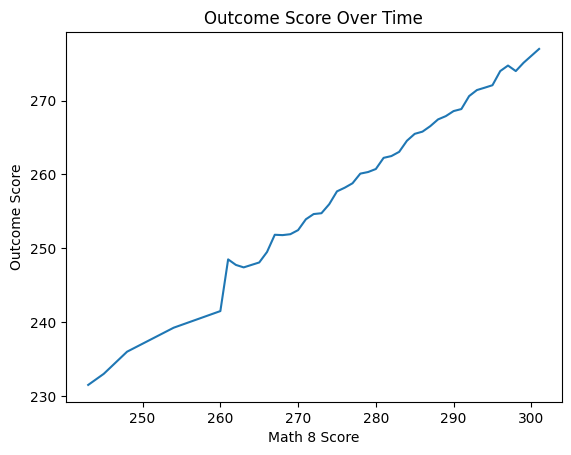

In [202]:
df.dropna()

df.groupby('AVG_MATH_8_SCORE')["AVG_OUTCOME_SCORE"].mean().plot()
plt.ylabel('Outcome Score')
plt.xlabel('Math 8 Score')
plt.title('Outcome Score Over Time')



Text(0.5, 1.0, 'grades all Over Time')

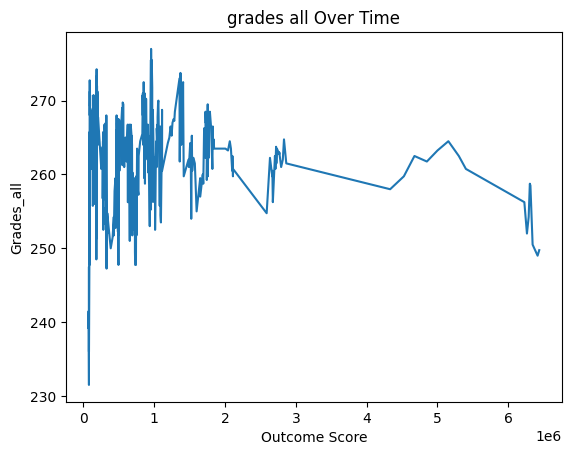

In [204]:


df.groupby('ENROLL_ALL')["AVG_OUTCOME_SCORE"].mean().plot()
plt.ylabel('Grades_all')
plt.xlabel('Outcome Score')
plt.title('grades all Over Time')



**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0.5, 1.0, 'expenditure Over Time')

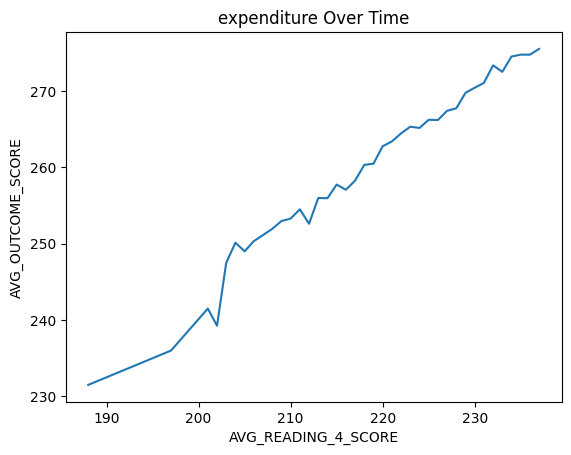

In [205]:
df.groupby('AVG_READING_4_SCORE')["AVG_OUTCOME_SCORE"].mean().plot()
plt.ylabel('AVG_OUTCOME_SCORE')
plt.xlabel('AVG_READING_4_SCORE')
plt.title('expenditure Over Time')




#There Seems to be a strong positive associative correlation between the scores of the 8th grade math scores and the outcome scores. There is also a strong positive associative correlatoin between the reading 4th grade scores. There is however, a weak to no correlation between the amount of students and the outcome scores of all states.

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X = df[['ENROLL_ALL','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_OUTCOME_SCORE']

In [208]:
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [209]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [210]:
# create your model here
model = LinearRegression()


In [215]:
model.fit(X_train, y_train)


0.976164913058936
0.04631898676536169
0.8243256039140842
1.0794210503191184


In [212]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [223]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

#the first value is how well the model did. Because the possible values are in between 0 and 1, the model did very well. The next few lines are different metrics for error. with mean absolute error and mean squared error, both being very low. The last line is root mean error which is a different way of measuring error in the regression. This value is also very low.

0.976164913058936
0.04631898676536169
0.8243256039140842
1.0794210503191184


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

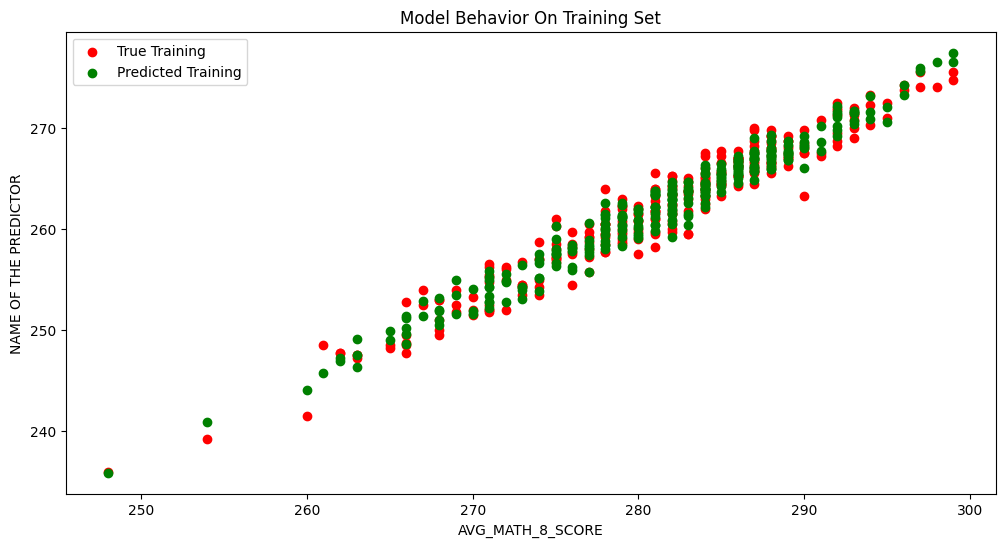

In [225]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

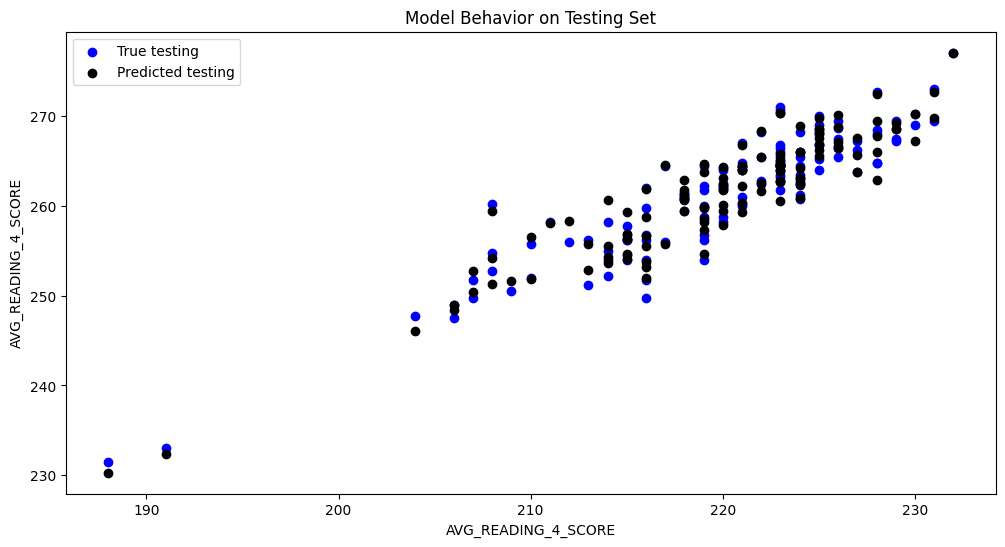

In [226]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

While analyzing the states.csv database, I was curious to see if there was a way to predict the overall score of students within every state based on the number of students, one individual math score during 8th grade, and one individual reading grade from fourth grade. In order to do this I gathered all of this data from every state in the United States from the data. I cleaned up the database so that there would be no blank valeus along with removing the possibilities for NAN values. Afterwards, I performed a linear regression model that calculated the line of best fit for the testing data. Afterwards, I found that the model score was about .97 which is very good. perhaps too good. There is a possibility for overfitting but it mainly depends on how similar my training and testing data are. Other ways I saw how good the model did was Mean squared Error, Mean Absolute Error, and Root Squared Error which all were very low values. 